<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/master/Tensorflow_2_0_Malaria_Parasite_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow 2.0 - Malaria Parasite Detection Using CNN**

Dataset - https://lhncbc.nlm.nih.gov/publication/pub9932



In [1]:
!pip install tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

fatal: destination path 'Malaria-Classification-Using-CNN' already exists and is not an empty directory.


In [6]:
img_width = 64
img_height = 64

In [7]:
# Rescaling the image between 0 to 1 and spliting the data in test and train.
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [8]:
train_data_generator = datagen.flow_from_directory(directory="/content/Malaria-Classification-Using-CNN/malaria-dataset", 
                                                   target_size=(img_width, img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset="training")

Found 22048 images belonging to 2 classes.


In [9]:
validation_data_generator = datagen.flow_from_directory(directory="/content/Malaria-Classification-Using-CNN/malaria-dataset", 
                                                   target_size=(img_width, img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset="validation")

Found 5510 images belonging to 2 classes.


In [10]:
train_data_generator.labels, validation_data_generator.labels

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32))

# **Build CNN Model**

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(img_width, img_height, 3), activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [13]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit_generator(generator = train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)
                              )

Epoch 1/5
1378/1378 [==============================] - 163s 118ms/step - loss: 0.5436 - accuracy: 0.7242 - val_loss: 0.2556 - val_accuracy: 0.9129
Epoch 2/5
1378/1378 [==============================] - 155s 112ms/step - loss: 0.2234 - accuracy: 0.9165 - val_loss: 0.1766 - val_accuracy: 0.9260
Epoch 3/5
1378/1378 [==============================] - 148s 108ms/step - loss: 0.1840 - accuracy: 0.9393 - val_loss: 0.1629 - val_accuracy: 0.9399
Epoch 4/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1617 - accuracy: 0.9482 - val_loss: 0.2500 - val_accuracy: 0.9096
Epoch 5/5
1378/1378 [==============================] - 143s 103ms/step - loss: 0.1501 - accuracy: 0.9534 - val_loss: 0.2091 - val_accuracy: 0.9410


In [15]:
history.history

{'accuracy': [0.72423804, 0.91645503, 0.93931425, 0.9482493, 0.95337445],
 'loss': [0.5435790645258693,
  0.22335468949709514,
  0.1839564192366985,
  0.16170731099445443,
  0.15010936947131234],
 'val_accuracy': [0.91288567, 0.9259528, 0.9399274, 0.90961885, 0.9410163],
 'val_loss': [0.25558297830647314,
  0.17664019563167854,
  0.1629013730213046,
  0.25003061197374177,
  0.20906532622765803]}

In [16]:
epoch_range = range(1, 6)

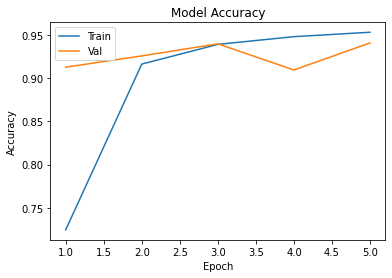

In [17]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

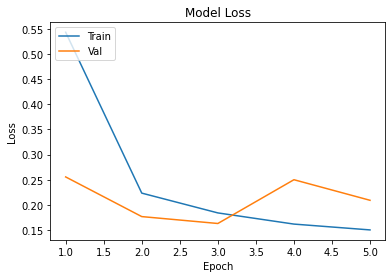

In [18]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()